In [1]:
from ahh import pre, vis
import pandas as pd
import numpy as np

In [2]:
def get_heat_index(tf, rh):
    """
    :param tf: (scalar/array) - temperature in F # note I used tf instead of t to be slightly more explicit
    :param rh: (scalar/array) - relative humidity in %
    :return hi: (scalar/array) - heat index in F
    """
    hi = (-42.379 # because it is such a long equation
          + (2.04901523 * tf) # I like to surround
          + (10.14333127 * rh) # all of it in parentheses so I don't have to use
          - (0.22475541 * tf * rh) # the backwards backslash "\"
          - (6.83783e-3 * np.square(tf)) # to continue to next line
          - (5.481717e-2 * np.square(rh)) # also I have one term per line
          + (1.22874e-3 * np.square(tf) * rh) # so it's easier to debug
          + (8.5282e-4 * tf * np.square(rh)) # if necessary
          - (1.99e-6 * np.square(tf) * np.square(rh))
          )
    return hi

df = pre.read_csv('CMI.txt', skiprows=5, strip=True, date='valid')
df = df.drop('station', axis=1)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.resample('1H').max()
df.index = df.index.shift(-5, freq='H')
df = df.dropna()
df['hidx'] = get_heat_index(df['tmpf'], df['relh'])

quad_dates = ['2013-08-25', '2014-08-24', '2015-08-23', '2016-08-21']

/home/solactus/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


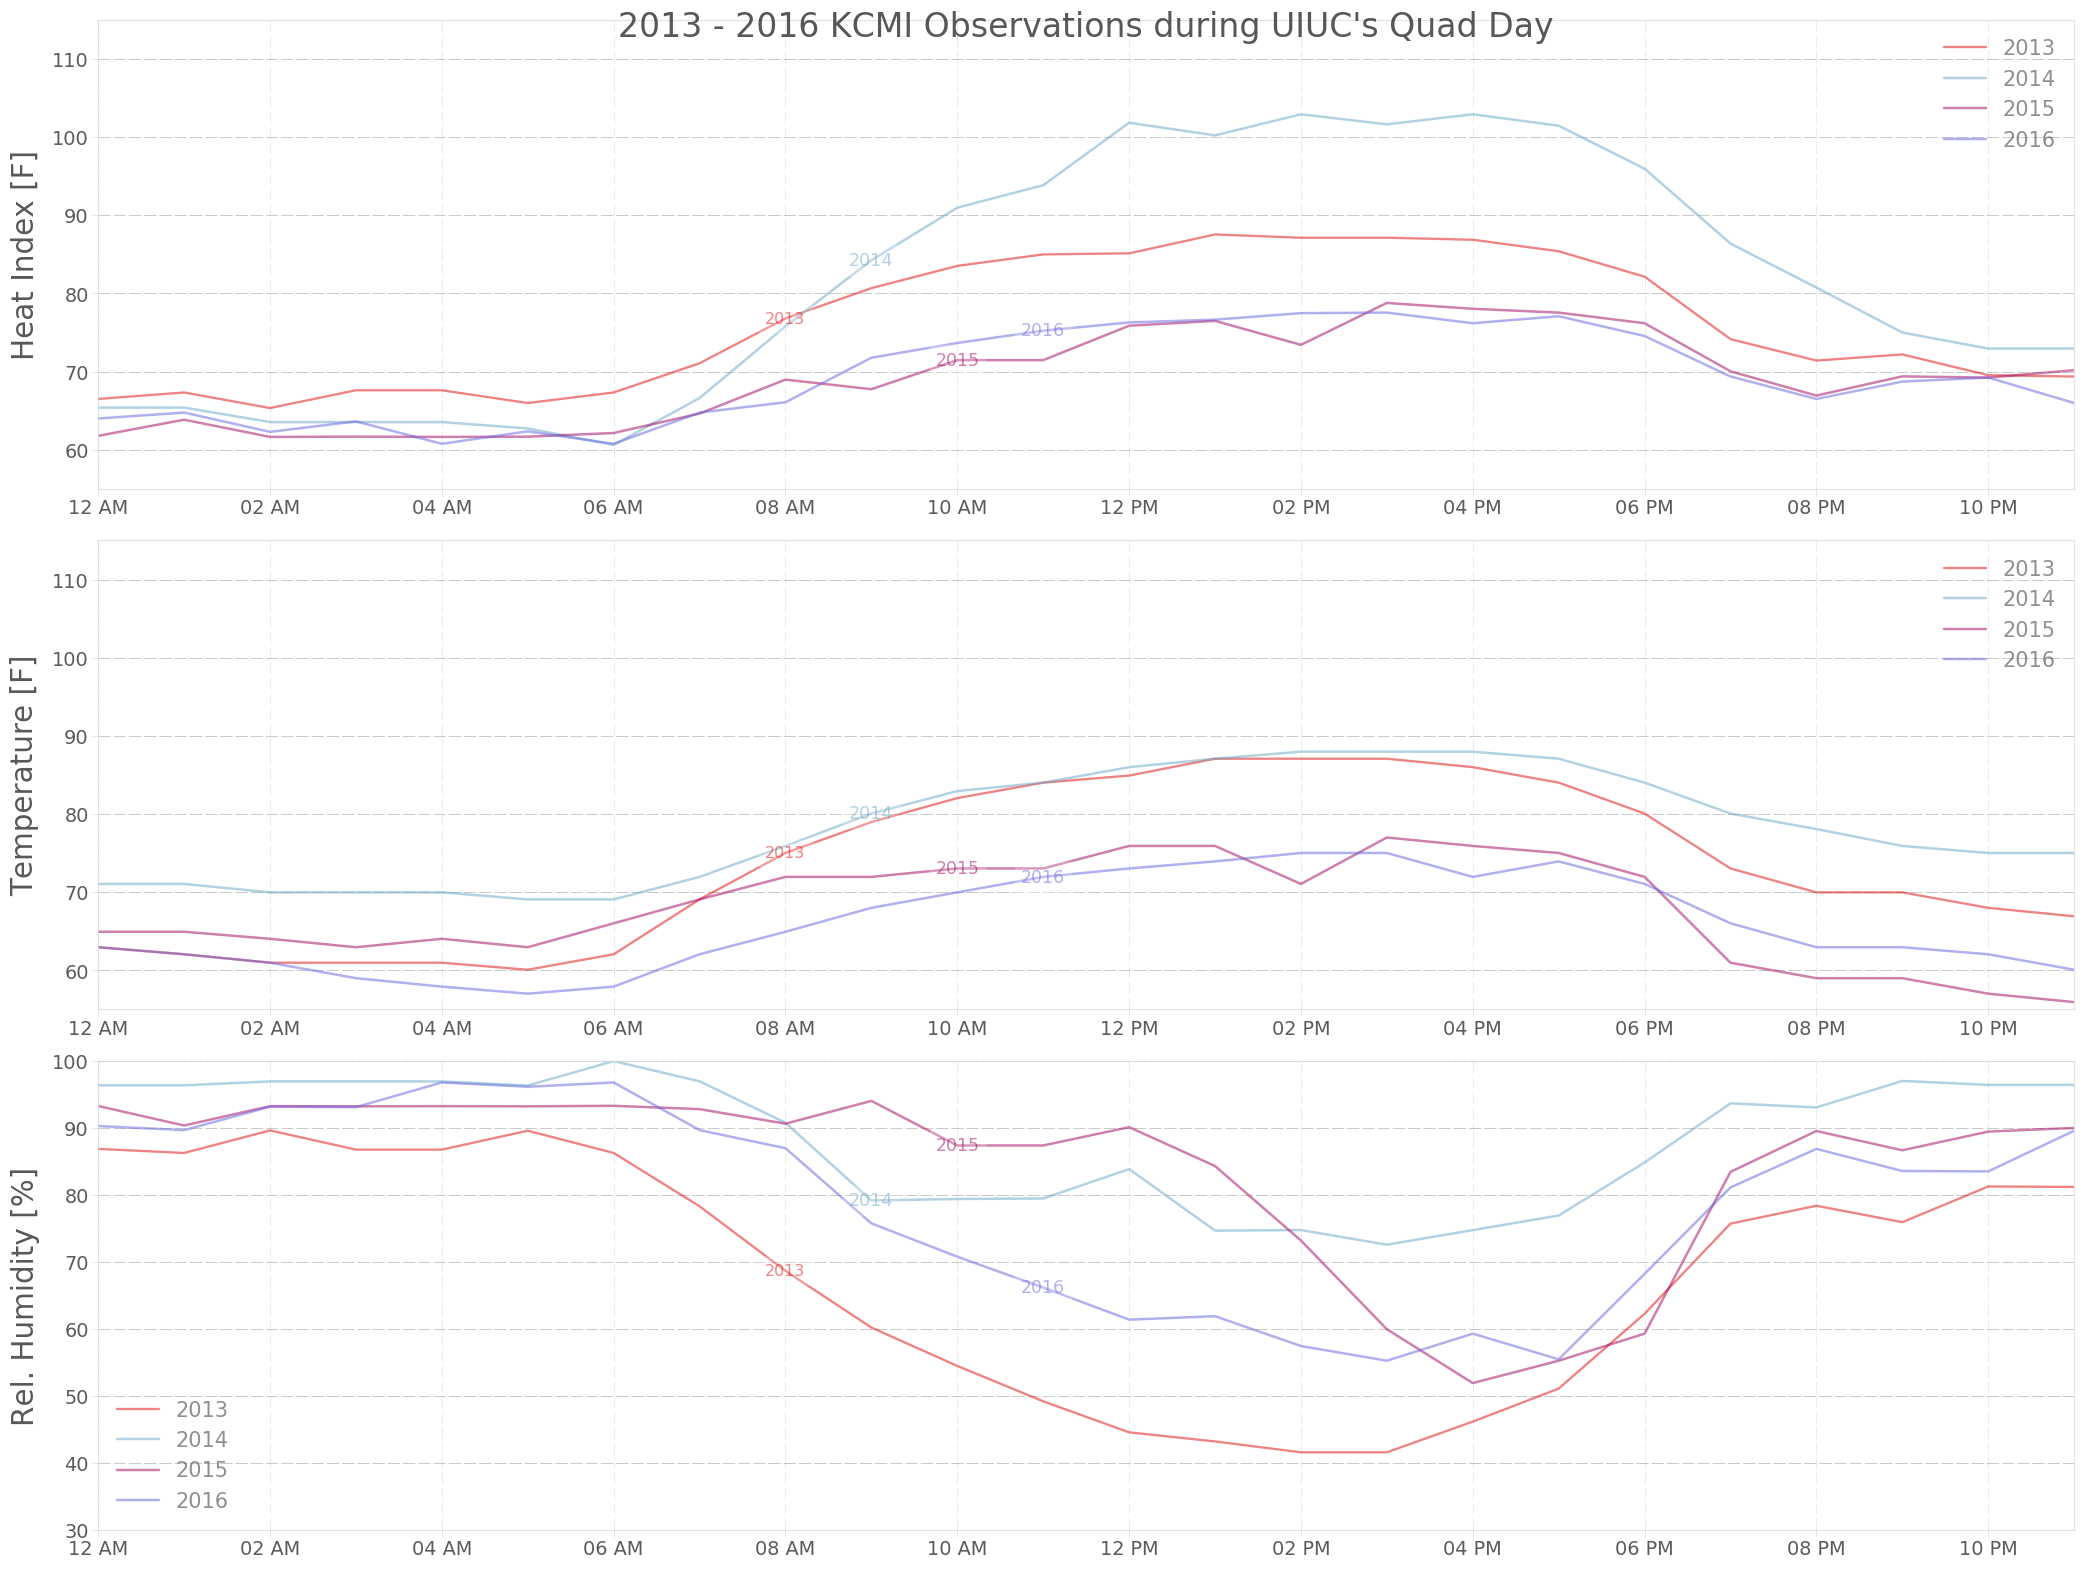

In [3]:
_ = vis.set_figsize(20, 15)

for i, quad_date in enumerate(quad_dates):
    vis_dict = dict(label_inline=8 + i,
                    label=quad_date[:4],
                    rows=3,
                    color=vis.COLOR_LIST[i])

    df_sub = df.loc[(df.index >= quad_date)][:24]
    ax = vis.plot_line(df_sub['hidx'],
                       figsize='na',
                       ylabel='Heat Index [F]',
                       ylim=(55, 115),
                       pos=1,
                       **vis_dict)
    ax2 = vis.plot_line(df_sub['tmpf'],
                        figsize='na',
                        ylabel='Temperature [F]',
                        ylim=(55, 115),
                        pos=2,
                        **vis_dict)
    ax3 = vis.plot_line(df_sub['relh'],
                        figsize='na',
                        ylabel='Rel. Humidity [%]',
                        ylim=(30, 100),
                        pos=3,
                        **vis_dict)

xlabels = df_sub.index.strftime('%I %p')
for axis in [ax, ax2, ax3]:
    _ = vis.set_major_ticks(axis, xticks=range(0, len(xlabels), 2))
    _ = vis.set_major_tick_labels(axis, xticklabels=xlabels[::2])
vis.set_labels(ax, title='2013 - 2016 KCMI Observations during UIUC\'s Quad Day', length_scale=False)